# Calculando o Beta entre ativos

In [1]:
import pandas as pd
from pandas_datareader import data as wb

### Selecionando os tickers

In [2]:
TickerA = 'CSAN3.SA' #ativo A
TickerB = 'GGBR4.SA' #ativo B

tickers = [TickerA, TickerB]
data=pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start = '2016-1-1', end = '2020-7-17')['Adj Close']

### Plotando o grafíco dos ativos

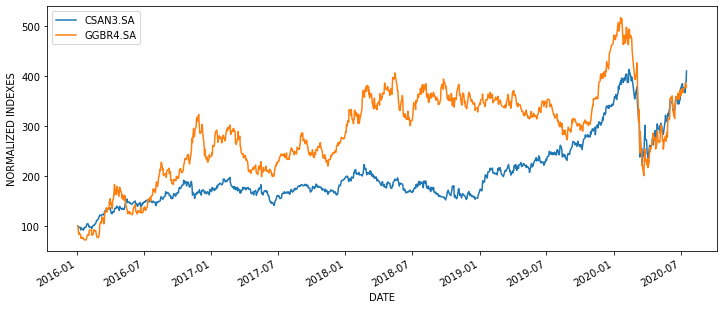

In [3]:
from matplotlib import pyplot as plt
datanorm=data/data.iloc[0]*100
datanorm.plot(figsize=(12,5))
plt.xlabel('DATE')
plt.ylabel('NORMALIZED INDEXES')
plt.show()

### Transformando os retornos em LOG e gerando o grafíco

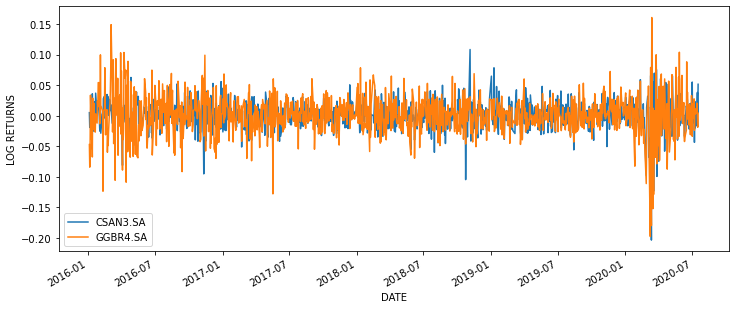

In [4]:
import numpy as np
log_returns = np.log(data/data.shift(1))
log_returns.plot(figsize=(12,5))
plt.xlabel('DATE')
plt.ylabel('LOG RETURNS')
plt.show()

### Calculando a covariância dos logáritimos dos retornos

In [5]:
cov = log_returns.cov()*250             #covariância dos dados
var_m = log_returns[TickerB].var()*250  #variância do mercado
cov

,CSAN3.SA,GGBR4.SA
CSAN3.SA,0.148851,0.098538
GGBR4.SA,0.098538,0.272836


### Calculando o Beta

In [7]:
Am_cov = cov.iloc[0,1]   #Am_cov : covariância(CSAN3.SA x GGBR4.SA )
A_beta = Am_cov/var_m